## In this notebook, I will:

* Examine parallel trends in a few years worth of recurrence data prior to the program year (August 2019)
* See if the 202 treatment and control Adm 2 districts have the same trajectory in terms of % flooded cropland


* You would need to first split the 161 municipalities between those that are flood prone and those that are not at risk of flooding. You would use for this long term data on flooding at the municipal level.

* The flood group prone will be your T group. The others your C group. Validity of C as a conterfactual to T would be established by testing for parallel trends in the wealth and food indicators between the two group before introduction of flood warning in August 2019.

* Impact would be measured by double difference between the last observation before introduction of the scheme (July  2019) and the last observation under the scheme (October 2020).

* The program is active during the rainy season every year, namely July/Aug to Oct/Nov. You observe 2019 and 2020. There will be similar observations for the 2021 rainy season.

If the test of parallel trends is not satisfied, there is a way of constructing a counterfactual with a "synthetic" method. But we can explore this later according to the results of the parallel rends test.
Does this look OK to you?


In [1]:
import pandas as pd

## load TC assignment
path_input = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/'
name_input_file = 'Final_Adm2_TC_Assignment.csv'
tc_df = pd.read_csv(path_input+name_input_file)

## load crop recurrence
path_input = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/Crops/Output/'
name_input_file = 'District-level_Crops_Recurrence.csv'
crop_recurrence = pd.read_csv(path_input+name_input_file)

In [2]:
# merge crop recurrence into treatment-control df
df = tc_df.merge(crop_recurrence, left_on='Region', right_on='Region')
df = df.drop('Total_Flood_Risk',axis=1)
df

,Region,Treatment,02Year,05Year,10Year,15Year,20Year
0,Saboba,1,0.12,3.75,13.41,20.38,33.28
1,West Mamprusi,1,0.83,6.32,38.76,59.25,86.98
2,Karaga,1,0.25,5.96,12.46,18.69,28.24
3,Binduri,1,0.32,0.65,0.92,1.33,2.61
4,Chereponi,1,0.21,3.11,7.65,10.78,15.71
...,...,...,...,...,...,...,...
197,Jaman South,0,0.00,0.00,0.00,0.00,0.00
198,Ledzokuku / Krowor,0,0.00,0.00,0.00,0.00,0.00
199,Asokore Mampong Municipal,0,0.00,0.00,0.00,0.00,0.00
200,Bia West,0,0.00,0.00,0.00,0.00,0.00


In [3]:
df.groupby('Treatment').size()

Treatment
0    141
1     61
dtype: int64

In [4]:
mydata = df.groupby('Treatment').mean().reset_index().T
mydata = mydata.drop(mydata.index[0])
mydata

,0,1
02Year,0.047021,0.168361
05Year,0.204184,1.556557
10Year,0.501489,4.755738
15Year,0.668227,6.879016
20Year,0.944894,10.088033


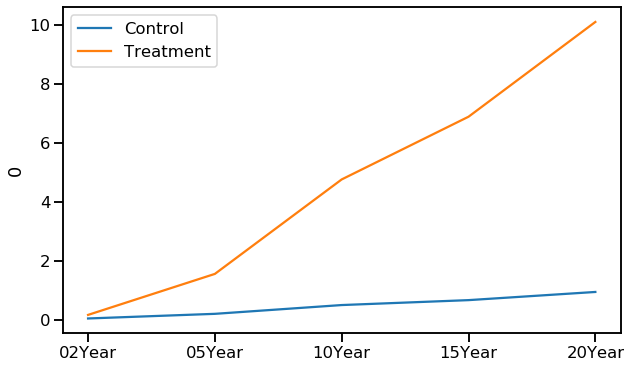

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x = mydata.index, y = mydata[0], label='Control')
sns.lineplot(x = mydata.index, y = mydata[1], label= 'Treatment')

plt.legend()
plt.show()